In [245]:
import pandas as pd
from twython import Twython
import tweepy
from tweepy import OAuthHandler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [183]:
df = pd.read_csv('data/2012_Sandy_Hurricane-ontopic_offtopic.csv')

In [184]:
df.head()

,tweet id,tweet,label
0,'262596552399396864',I've got enough candles to supply a Mexican fa...,off-topic
1,'263044104500420609',Sandy be soooo mad that she be shattering our ...,on-topic
2,'263309629973491712',@ibexgirl thankfully Hurricane Waugh played it...,off-topic
3,'263422851133079552',@taos you never got that magnificent case of B...,off-topic
4,'262404311223504896',"I'm at Mad River Bar &amp; Grille (New York, N...",off-topic


In [185]:
df.shape

(10008, 3)

In [186]:
df['tweet id'] = df['tweet id'].str.strip('\'')
df['tweet id'] = df['tweet id'].astype(int)

In [187]:
df.head()

,tweet id,tweet,label
0,262596552399396864,I've got enough candles to supply a Mexican fa...,off-topic
1,263044104500420609,Sandy be soooo mad that she be shattering our ...,on-topic
2,263309629973491712,@ibexgirl thankfully Hurricane Waugh played it...,off-topic
3,263422851133079552,@taos you never got that magnificent case of B...,off-topic
4,262404311223504896,"I'm at Mad River Bar &amp; Grille (New York, N...",off-topic


In [188]:
df.dtypes

tweet id     int64
 tweet      object
 label      object
dtype: object

In [189]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [190]:
df.columns

Index(['tweet id', 'tweet', 'label'], dtype='object')

In [191]:
df.describe(include='object')

,tweet,label
count,10008,10008
unique,9431,2
top,"RT @HurricaneSandyw: FOR EVERY 100 RETWEETS, W...",on-topic
freq,28,6138


In [192]:
df.drop_duplicates(['tweet'], inplace=True)
df.describe(include = 'object')

,tweet,label
count,9431,9431
unique,9431,2
top,Well that was an easy 13 points #Giants,on-topic
freq,1,5579


In [193]:
df.isnull().sum()

tweet id    0
tweet       0
label       0
dtype: int64

In [206]:
df.replace(to_replace = ["off-topic", "on-topic"], value =[0, 1], inplace=True)

In [207]:
df.head()

,tweet id,tweet,label
0,262596552399396864,I've got enough candles to supply a Mexican fa...,0
1,263044104500420609,Sandy be soooo mad that she be shattering our ...,1
2,263309629973491712,@ibexgirl thankfully Hurricane Waugh played it...,0
3,263422851133079552,@taos you never got that magnificent case of B...,0
4,262404311223504896,"I'm at Mad River Bar &amp; Grille (New York, N...",0


In [256]:
df.to_csv('data/sandy.csv', index=False)

## EDA

In [208]:
X = df['tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cvec = CountVectorizer(ngram_range = (1,2),
                       stop_words = 'english')
X_train = cvec.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_df

,00,00 00,00 59,00 est,00 gmt,00 humidity,00 ing,00 packing,00 pm,00 year,...,zxnhdkzl,zxntguka,zyhwl7lf,zyhwl7lf youtube,zz5vp7zr,zz5vp7zr hurry,zzcr2jei,zzlxukbm,zzvftd8r,zzxgabhw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Most Common Words Overall')

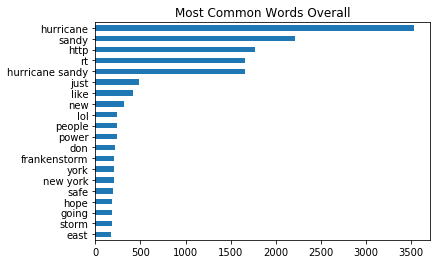

In [254]:
X_train_df.sum().sort_values(ascending = False).head(50) 

top_words = (X_train_df.sum().sort_values(ascending = False).head(20))
top_words.sort_values(ascending=True).plot(kind='barh')
plt.title('Most Common Words Overall')

In [211]:
positive = df[df['label'] == 1]
negative = df[df['label'] == 0]

In [214]:
X = positive['tweet']
y = positive['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cvec = CountVectorizer(ngram_range = (1,2),
                       stop_words = 'english')
X_train = cvec.fit_transform(X_train)
X_train_dfp = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_dfp

,00,00 est,00 gmt,00 humidity,00 packing,00 pm,00 today,000,000 customers,000 grant,...,zuury0fs,zvirufd7,zxnhdkzl,zxntguka,zyhwl7lf,zyhwl7lf youtube,zyp9wwdp,zzcr2jei,zzlxukbm,zzxgabhw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Most Common Words - Positive')

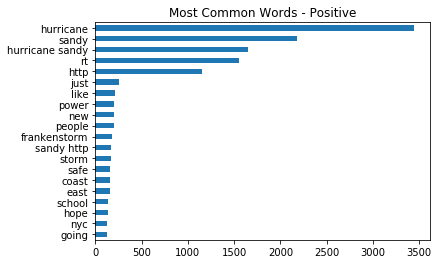

In [252]:
top_positive = (X_train_dfp.sum().sort_values(ascending = False).head(20))
top_positive.sort_values(ascending=True).plot(kind='barh')
plt.title('Most Common Words - Positive')

In [217]:
X = negative['tweet']
y = negative['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cvec = CountVectorizer(ngram_range = (1,2),
                       stop_words = 'english')
X_train = cvec.fit_transform(X_train)
X_train_dfn = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_dfn

,00,00 gmt,00 humidity,000,000 dollars,000 people,05,05 billion,05 bus,05 thuglife,...,zqu,zqzv3atn,zrikpxda,zstsmmbt,ztbaidze,ztvfj5dx,zula7ivv,zwbr1gcc,zxl85vfn,zzvftd8r
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Most Common Words - Negative')

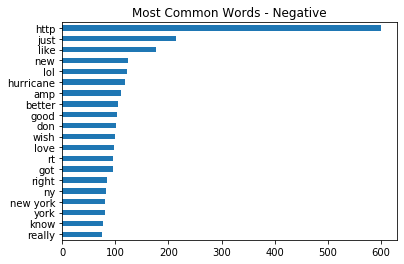

In [253]:
top_negative = (X_train_dfn.sum().sort_values(ascending = False).head(20))
top_negative.sort_values(ascending=True).plot(kind='barh')
plt.title('Most Common Words - Negative')

In [227]:
df[df['tweet'].str.contains['@']]
df[df['ids'].str.contains('ball', na = False)]

TypeError: 'method' object is not subscriptable

### Tf-Idf and KMeans

In [230]:
tvec = TfidfVectorizer(stop_words="english") # Code from Sanjaya Subedi
tvec.fit(df['tweet'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [232]:
features = tvec.transform(df['tweet'].values)

In [234]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [242]:
preds = kmeans.predict(features)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [241]:
kmeans.cluster_centers_

array([[3.28806273e-04, 1.88546598e-04, 9.39127168e-05, ...,
        0.00000000e+00, 9.41072382e-05, 0.00000000e+00],
       [6.34358112e-04, 7.72904557e-04, 0.00000000e+00, ...,
        1.29738395e-04, 0.00000000e+00, 1.14583248e-04]])

In [246]:
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(features.toarray())

Text(0.5, 1.0, 'Clear separation of labels, with slight overlap')

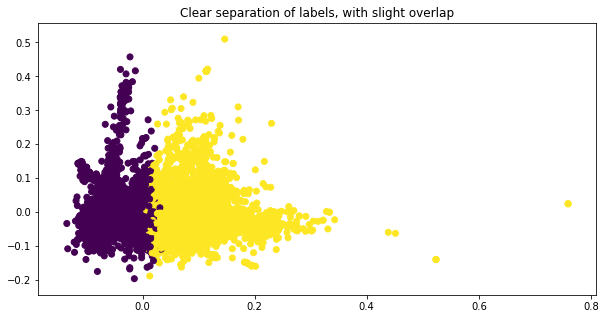

In [251]:
plt.figure(figsize=(10,5))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(features))
plt.title('Clear separation of labels, with slight overlap')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### CountVec and DBSCAN

In [221]:
sc = StandardScaler()
df_scaled = sc.fit_transform(X_train_df)

In [222]:
dbscan = DBSCAN()
dbscan.fit(df_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [223]:
set(dbscan.labels_)

{-1}

In [226]:
silhouette_score(X_train_df, dbscan.labels_)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)